**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Optimal taxation with government consumption](#toc1_)    
- 2. [Problem 2: Labor adjustment costs](#toc2_)    
- 3. [Problem 3: Global optimizer with refined multi-start](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [11]:
# write your code here

## 1. <a id='toc1_'></a>[Problem 1: Optimal taxation with government consumption](#toc0_)


Consider a worker choosing hours of labor, $L\in[0,24]$, to maximize utility: 

$$
\begin{align*}
V(w,\tau,G)&=\max_{L\in[0,24]}\ln\left(C^{\alpha}G^{1-\alpha}\right)-\nu\frac{L^{2}}{2}\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}
$$

where 

* $C$ is *private* consumption with weight $\alpha\in(0,1)$.
* $\kappa > 0$ is the *free private* consumption component.
* $(1-\tau)wL$ is the *costly private* consumption component.
* $w > 0 $ is the real wage.
* $\tau \in (0,1)$ is the labor-income tax rate.
* $G > 0 $ is *government* consumption with weight $1-\alpha$.
* $\nu > 0$ is the disutility of labor scaling factor


The baseline parameters are:

$$
\begin{align*}
\alpha &= 0.5\\
\kappa &= 1.0\\
\nu &= \frac{1}{2\cdot16^2} \\
w &= 1.0 \\ 
\tau &= 0.30 \\
\end{align*}
$$

### Question 1:

Verify that the optimal labor supply choice is $L^{\star}(\tilde{w}) =\frac{-\kappa+\sqrt{\kappa^{2}+4\frac{\alpha}{\nu}\tilde{w}^2}}{2\tilde{w}}$, where $\tilde{w} = (1-\tau)w$, for $G\in\left\{1.0 , 2.0\right\}$.

In [12]:
from sympy import symbols, diff, solve, sqrt, simplify, log, init_printing
from sympy.abc import alpha, kappa, nu, w, tau, L

w_tilde = (1-tau)*w

wtilde = symbols('wtilde')  # real wage

# define nu as strictly positive
nu = symbols('nu', positive=True)

# Define the variables
C = kappa + wtilde*L
G = symbols('G')  # government consumption
V = log(C**alpha * G**(1-alpha)) - nu*(L**2/2)  # utility function

# Derive the utility function with respect to labor
dV_dL = diff(V, L)

# Solve the first order condition for labor
L_star = solve(dV_dL, L)

# Print the solution
print("The optimal labor supply choice is:")

# simplify the solution
L_star = simplify(L_star[1])

display(L_star)


    

The optimal labor supply choice is:


-kappa/(2*wtilde) + sqrt(4*alpha*wtilde**2 + kappa**2*nu)/(2*sqrt(nu)*wtilde)

### Question 2:

Illustrate how $L^{\star}(\tilde{w})$ depends on $w$.

Optimal labor supply equation:


(-kappa + sqrt(4*alpha*w_tilde**2/nu + kappa**2))/(2*w_tilde)

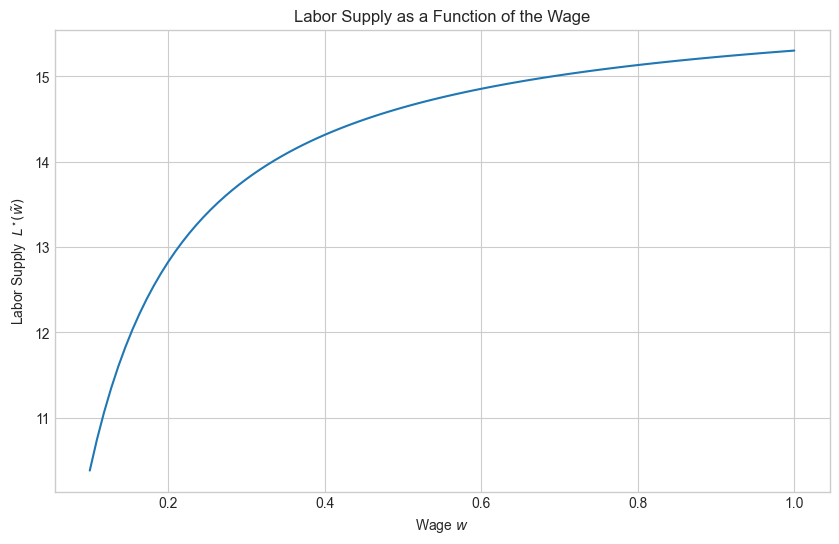

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import symbols, sqrt

# Define symbols
kappa, alpha, nu, w_tilde = symbols('kappa alpha nu w_tilde')

# Define the equation for optimal labor supply
L_star_w = (-kappa + sqrt(kappa**2 + 4*(alpha/(nu))*w_tilde**2))/(2*w_tilde)
L_star_full = L_star_w.subs(w_tilde, (1-tau)*w)

# Display the equation
print("Optimal labor supply equation:")
display(L_star_w)

# Define the values for w_vec
w_vec = np.linspace(0.1, 1, 100)

# Define the baseline parameters
alpha = 0.5
kappa = 1.0
nu = 1/(2*16**2)
tau = 0.30

# Calculate the corresponding w_tilde values
w_tilde_vec = (1 - tau) * w_vec

# Calculate the optimal labor supply for each w_tilde value
L_vec = []
for w_tilde_val in w_tilde_vec:
    L_star_w_val = (-kappa + sqrt(kappa**2 + 4*(alpha/(nu))*w_tilde_val**2))/(2*w_tilde_val)
    L_vec.append(L_star_w_val)

# Plot the results
plt.style.use('seaborn-whitegrid')
fig = plt.figure()

# create fig size
fig.set_figwidth(10)
fig.set_figheight(6)


ax = fig.add_subplot(1, 1, 1)
ax.plot(w_vec, L_vec)
ax.set_xlabel('Wage ' + r'$w$')
ax.set_ylabel('Labor Supply  ' + r'$L^{\star}(\tilde{w})$')
ax.set_title('Labor Supply as a Function of the Wage')
plt.show()



We now consider a government, who chooses $\tau$ and spend all of the taxes on government consumption so:

$$
G = \tau w L^{\star}((1-\tau)w)
$$

### Question 3:

Plot the implied $L$, $G$ and worker utility for a grid of $\tau$-values.


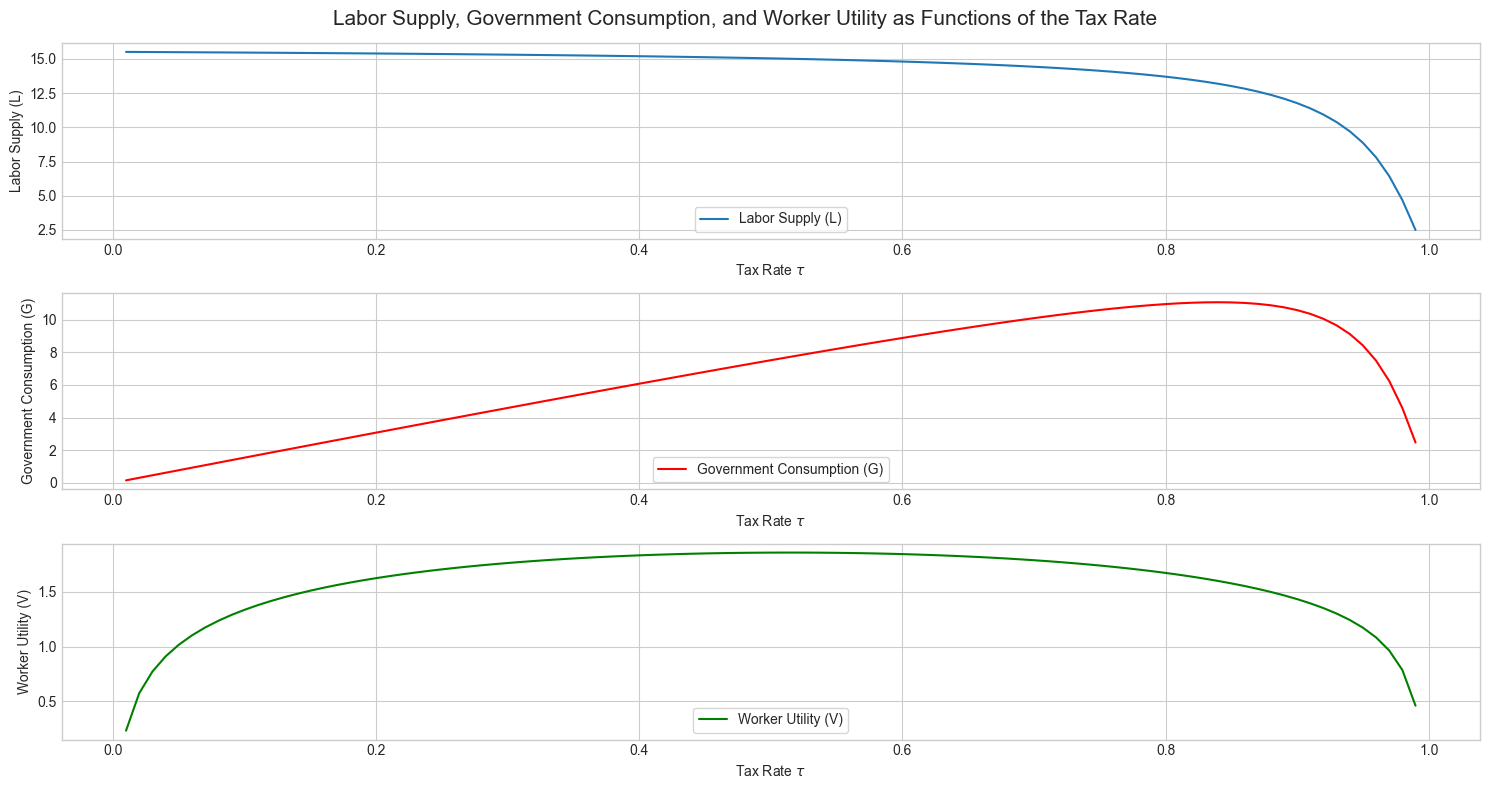

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, log
from numba import njit


# Define the baseline parameters
alpha = 0.5
kappa = 1.0
nu = 1/(2*16**2)
w = 1.0
tau_values = np.linspace(0.01, 0.99, 99)

# Calculate L for each tau value
L_values = [(-kappa + sqrt(kappa**2 + 4*(alpha/nu)*((1 - tau)*w)**2))/(2*((1 - tau)*w)) for tau in tau_values]

# Calculate G for each tau value
G_values = [tau * w * L for tau, L in zip(tau_values, L_values)]

# Calculate V for each tau value
V_values = [log((kappa + (1 - tau)*w*L)**alpha * G**(1 - alpha)) - nu*L**2/2 for tau, L, G in zip(tau_values, L_values, G_values)]

# Plot L, G, and V as functions of tau
plt.figure(figsize=(15, 8))

# create title for the whole plot
plt.suptitle('Labor Supply, Government Consumption, and Worker Utility as Functions of the Tax Rate', fontsize = 15)

# create fig size
fig.set_figwidth(15)
fig.set_figheight(10)

# create subplots
plt.subplot(3, 1, 1)
plt.plot(tau_values, L_values, label='Labor Supply (L)')
plt.xlabel('Tax Rate ' +r'$\tau$', fontsize = 10)
plt.ylabel(r'Labor Supply (L)', size = 10)
plt.legend(fontsize = 10, loc = 'lower center', frameon = True)

plt.subplot(3, 1, 2)
plt.plot(tau_values, G_values, label='Government Consumption (G)', color = 'red')
plt.xlabel('Tax Rate ' +r'$\tau$', fontsize = 10)
plt.ylabel(r'Government Consumption (G)', size = 10)
plt.legend(fontsize = 10, loc = 'lower center', frameon = True)

plt.subplot(3, 1, 3)
plt.plot(tau_values, V_values, label='Worker Utility (V)', color = 'green')
plt.xlabel('Tax Rate ' +r'$\tau$', fontsize = 10)
plt.ylabel(r'Worker Utility (V)', size = 10)
plt.legend(fontsize = 10, loc = 'lower center', frameon = True)

plt.tight_layout()
plt.show()



### Question 4:

Find the socially optimal tax rate $\tau^{\star}\in(0,1)$ maximizing worker utility. Illustrate your result.

The optimal tax rate is:  0.5145311213913639
The optimal tax rate is:  0.5145311213913639
The corresponding Worker Utility is:  1.8591603818974627


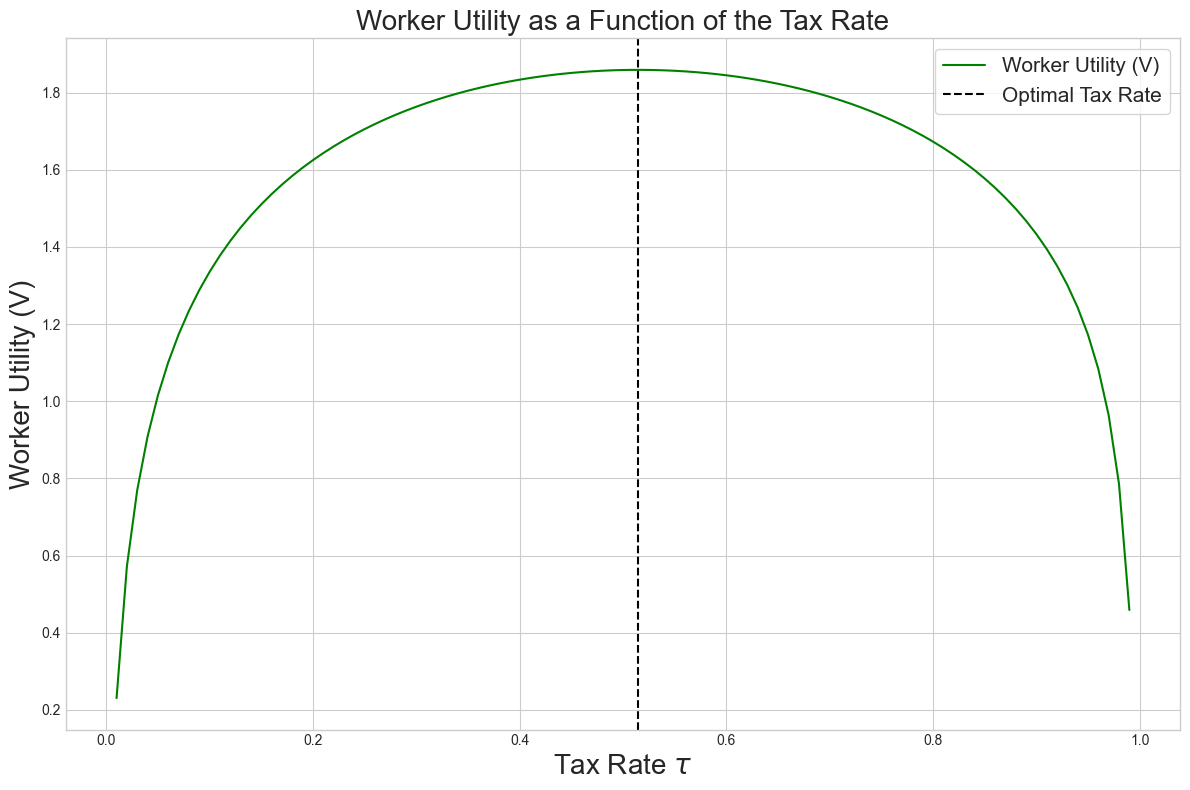

In [15]:
# find the socially optimal tax rate, which maximizes the worker utility
import time

# Define the baseline parameters
alpha = 0.5
kappa = 1.0
nu = 1/(2*16**2)
w = 1.0
tau_values = np.linspace(0.01, 0.99, 99)

# Calculate V for each tau value 
V_values = [log((kappa + (1 - tau)*w*L)**alpha * G**(1 - alpha)) - nu*L**2/2 for tau, L, G in zip(tau_values, L_values, G_values)]

# find the optimal value for tau numerically by using the scipy.optimize.minimize_scalar function
# import the minimize_scalar function
from scipy.optimize import minimize_scalar

# Define the objective function

def objective_function(tau):
    L = (-kappa + sqrt(kappa**2 + 4*(alpha/nu)*((1 - tau)*w)**2))/(2*((1 - tau)*w))
    G = tau * w * L
    V = log((kappa + (1 - tau)*w*L)**alpha * G**(1 - alpha)) - nu*L**2/2
    return -V

# find the optimal tau value
optimal_tau = minimize_scalar(objective_function, bounds=(0, 1), method='bounded').x

print("The optimal tax rate is: ", optimal_tau)

# print the result
print("The optimal tax rate is: ", optimal_tau)
print("The corresponding Worker Utility is: ", max(V_values))


# Illustrate the optimal tax rate with a plot, which shows the worker utility as a function of the tax rate and a vertical line at the optimal tax rate
# Plot V as a function of tau
plt.figure(figsize=(12, 8))

# create title
plt.title('Worker Utility as a Function of the Tax Rate', fontsize = 20)

# define fig size
fig.set_figwidth(15)
fig.set_figheight(10)

# create plot
plt.plot(tau_values, V_values, label='Worker Utility (V)', color = 'green')

# create vertical line at the optimal tax rate
plt.axvline(x = optimal_tau, color = "black", linestyle = '--', label = 'Optimal Tax Rate')
# create labels
plt.xlabel('Tax Rate ' +r'$\tau$', fontsize = 20)
plt.ylabel(r'Worker Utility (V)', size = 20)
plt.legend(fontsize = 15, frameon = True)
plt.tight_layout()

# show plot
plt.show()



A more general preference formulation for the worker is:

$$
\begin{align*}
\mathcal{V}(w,\tau,G)&=\max_{L\in[0,24]}\frac{\left[ \left( \alpha C^{\frac{\sigma-1}{\sigma}}+(1-\alpha) G^{\frac{\sigma}{\sigma-1}} \right)^{\frac{\sigma}{1-\sigma} }\right]^{1-\rho}-1}{1-\rho}- \nu\frac{L^{1+\varepsilon}}{1+\varepsilon},\,\,\,\varepsilon,\rho,\sigma>0,\,\,\,\rho,\sigma\neq1\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}    
$$

Optimal labor supply is now $L^{\star}(\tilde{w},G)$.

Questions 5 and 6 must be answered with the general formulation, and for 2 different set of parameters:

- Set 1:  $\sigma = 1.001$, $\rho = 1.001$ and $\varepsilon = 1.0$.
- Set 2:  $\sigma = 1.5$, $\rho = 1.5$ and $\varepsilon = 1.0 $.

### Question 5:

Find the $G$ that solves $G = \tau w L^{\star}((1-\tau)w,G)$ using the $\tau$ found in question 4.

*Hint: First write code that solves the worker problem for given values of $G$ and $\tau$. Then find the correct G based on this.*

In [16]:
from scipy.optimize import minimize
from scipy.optimize import fsolve
from scipy import optimize

import warnings

# ignore warnings
warnings.filterwarnings("ignore")


def worker_problem(alpha, sigma, rho, nu, epsilon, kappa, tau, w, G):
    # setup the objective function
    obj = lambda L: - ((((alpha*(kappa + (1-tau) * w * L)**((sigma-1)/sigma) 
                         + (1-alpha)*G**((sigma-1)/sigma))**(sigma/(sigma-1)))**(1-rho) - 1)
                         / (1-rho) - nu * L**(1+epsilon) / (1+epsilon))

    # solve for the optimal labor supply using Nelder-Mead minimization
    res = optimize.minimize(obj, x0=12, bounds=[(0,24)], method = 'Nelder-Mead')

    return res.x[0]


def g_solver(alpha, sigma, rho, nu, epsilon, kappa, tau, w):
    # setup the objective function
    obj = lambda G: G - tau * w * worker_problem(alpha=alpha, sigma=sigma, rho=rho, nu=nu, epsilon=epsilon, kappa=kappa, tau=optimal_tau, w=w, G=G)
    # solve for the optimal labor supply using BFSG minimization
    res = optimize.root_scalar(obj, bracket=(0,24), method = 'brentq')

    return res


sol_1 = g_solver(alpha=0.5, sigma=1.001, rho=1.001, nu=1/(2*16**2), epsilon=1, kappa=1.0, tau=optimal_tau, w=1.0)
sol_2 = g_solver(alpha=0.5, sigma=1.5, rho=1.5, nu=1/(2*16**2), epsilon=1, kappa=1.0, tau=optimal_tau, w=1.0)

print("The optimal government consumption for set 1 is: ", sol_1.root)
print("The optimal government consumption for set 2 is: ", sol_2.root)


#print(sol_1)
#print("\n")
#print(sol_2)



The optimal government consumption for set 1 is:  7.711221136979175
The optimal government consumption for set 2 is:  4.975224510211655


### Question 6:

Find the socially optimal tax rate, $\tau^{\star}$, maximizing worker utility, while keeping $G = \tau w L^{\star}((1-\tau)w,G)$.

In [17]:
from scipy.optimize import minimize

def calculate_utility(alpha, sigma, rho, nu, epsilon, kappa, tau, w):
    # Calculate G and L* for given tau
    G = g_solver(alpha=alpha, sigma=sigma, rho=rho, nu=nu, epsilon=epsilon, kappa=kappa, tau=tau, w=w).root
    L_star = worker_problem(alpha=alpha, sigma=sigma, rho=rho, nu=nu, epsilon=epsilon, kappa=kappa, tau=tau, w=w, G=G)
    
    # Calculate utility
    utility = ((((alpha * (kappa + (1 - tau) * w * L_star) ** ((sigma - 1) / sigma) 
                + (1 - alpha) * G ** ((sigma - 1) / sigma)) ** (sigma / (sigma - 1))) ** (1 - rho) - 1) / (1 - rho) 
                - nu * L_star ** (1 + epsilon) / (1 + epsilon))
    return -utility  # Negative of utility because we are going to minimize

# Define the parameters for the two sets
params_1 = {'alpha': 0.5, 'sigma': 1.001, 'rho': 1.001, 'nu': 1 / (2 * 16 ** 2), 'epsilon': 1, 'kappa': 1.0, 'w': 1.0}
params_2 = {'alpha': 0.5, 'sigma': 1.5, 'rho': 1.5, 'nu': 1 / (2 * 16 ** 2), 'epsilon': 1, 'kappa': 1.0, 'w': 1.0}

# Use a lambda function to bind the parameters to the calculate_utility function
utility_1 = lambda tau: calculate_utility(tau=tau, **params_1)
utility_2 = lambda tau: calculate_utility(tau=tau, **params_2)

# Solve the optimization problem for each set of parameters using Nelder-Mead minimization
result_1 = minimize(utility_1, x0=0.5, bounds=[(0.01, 0.99)], method='Nelder-Mead')
result_2 = minimize(utility_2, x0=0.5, bounds=[(0.01, 0.99)], method='Nelder-Mead')

print("Set 1 - Optimal tax rate: ", result_1.x[0])
print("Set 2 - Optimal tax rate: ", result_2.x[0])


Set 1 - Optimal tax rate:  0.5334960937500001
Set 2 - Optimal tax rate:  0.47148437499999996


The code ensures the budget constraint $G = τwL*(1-τ)w$ by iteratively calculating G and L* (labor supply) within the calculate_utility function. Here's how it works:

Using the current tax rate (tau) and the g_solver function, the code determines G. g_solver calculates G based on tau and other parameters, with .root extracting the root of the equation.

The worker_problem function then calculates the optimal labor supply (L*) using G and tau.

By performing these calculations with tau, the code maintains a balanced government budget for any evaluated tau value, satisfying $G = τwL*(1-τ)w$.

To find the tau maximizing utility, the minimize function is employed. With each call to calculate_utility, the budget constraint is enforced, ensuring the resulting tax rate keeps the government budget in balance.

## 2. <a id='toc2_'></a>[Problem 2: Labor adjustment costs](#toc0_)

You own a hair salon. You employ hairdressers, $\ell_t$, to produce haircuts, $y_t = \ell_t$.

The wage for each haridresser is $w$.

The demand for haircuts implies that the price of haircuts you can charge is $p_t = \kappa_t y_t^{-\eta}$, where $\kappa_t$ is a demand-shock and $\eta \in (0,1)$ measures the elasticity of demand.

Profits are:

$$
\Pi_t = p_t y_t - w \ell_t = \kappa_t \ell_t^{1-\eta} - w \ell_t
$$

Baseline parameters are:
- $\eta = 0.5$
- $w = 1.0$

**Question 1:** Verify numerically that $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ maximises profits, for $\kappa\in\left\{1.0 , 2.0\right\}$.

In [18]:
import examproject as ep
from numba import njit, jit


In [19]:
model = ep.LabourClass()
model.set_values()

kappa_vec = np.linspace(1.0, 2.0, 100)

l_vec = np.empty(100)
l_analytical = np.empty(100)

for i, kappa in enumerate(kappa_vec):
    l_vec[i] = model.optimal_l(kappa=kappa)
    l_analytical[i] = model.analytical_l(kappa=kappa)

plt.plot(kappa_vec, l_vec, label='Numerical')
plt.plot(kappa_vec, l_analytical, linestyle='--', alpha=0.75, label='Analytical')
plt.legend()
plt.show()

AttributeError: module 'examproject' has no attribute 'LabourClass'

We now consider a *dynamic* version of the model.

* The demand-shock is a so-called AR(1) in logs, 

$$
\log \kappa_{t} = \rho \log \kappa_{t-1} + \epsilon_{t},\,\,\, \epsilon_{t+1} \sim \mathcal{N}(-0.5\sigma_{\epsilon}^2,\sigma_{\epsilon})
$$

* Any hiring or firing implies a fixed adjustment cost, $\iota > 0 $.
* Future profits are discounted with a monthly factor of $R \in (0,1)$.

The initial demand shock is $\kappa_{-1} = 1$ and the planning horizon is 10 years, i.e. 120 months so $t \in \{0,1,2,\dots,119\}$. Initially you don't have any employees, $\ell_{-1}=0$


The *ex post* value of the salon is *conditional* on the shock series is:

$$
h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119}) = \left[\sum_{t=0}^{119}R^{-t}\left[\kappa_{t}\ell_{t}^{1-\eta}-w\ell_{t}-\boldsymbol{1}_{\ell_{t}\neq\ell_{t-1}}\iota\right]\right]
$$

The *ex ante* expected value of the salon can be approximated by

$$
H = \mathbb{E}[h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119})] \approx \frac{1}{K}\sum_{k=0}^{K} h(\epsilon_0^k,\epsilon_1^k,\dots,\epsilon_{119}^k)
$$

where each $k\in\{0,1,\dots,K-1\}$ is a random shock series. Maximizing profitability means maximizing $H$.


Baseline parameters are: 

- $\rho = 0.90$
- $\iota = 0.01$
- $\sigma_{\epsilon} = 0.10$
- $R = \left(1+0.01\right)^{1/12}$

**Question 2:** Calculate $H$ if the policy  $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ from question 1 is followed. Choose $K$ so the approximation is good enough to not affect your results substantially.

In [20]:
np.random.seed(2023)
eta = 0.5
w = 1.0
rho = 0.90
iota = 0.01
sigma_eps = 0.10
R = (1+0.01)**(1/12)
T = 120
K = 10000

# calculated the random shocks
eps = np.random.normal(-0.5*sigma_eps**2, sigma_eps, (K,T))

# calculate the log of kappa and kappa
log_kappa = np.zeros((K,T+1)) # with zeros the first column is already 0 as it should be

# calculate the log of kappa
for t in range(1, T+1):
    log_kappa[:,t] = rho * log_kappa[:,t-1] + eps[:,t-1]

# calculate kappa
kappa = np.exp(log_kappa)

@njit(fastmath=True)
def ex_post(R, kappa, l, w, eta, iota, t, T, K):
    # calculate the ex-post value of the salon
    single_period_value = np.zeros((K,T+1))
    iota_mat = np.zeros((K,T+1))

    for t in range(0,T+1):
        for k in range(0,K):
            if l[k,t] == l[k,t-1]:
                iota_mat[k,t] = 0
            else:
                iota_mat[k,t] = iota

    for t in range(1, T+1):
        single_period_value[:,t] = R**(-t) * (kappa[:,t]*l[:,t]**(1-eta)-w*l[:,t]-iota_mat[:,t])
    
    return np.sum(single_period_value, axis=1)

@njit(fastmath=True)
def policy1(eta, kappa, w):
    # calculate the optimal labor supply
    l = np.zeros((K,T+1))
    for t in range(1, T+1):
        l[:,t] = ((eta*kappa[:,t])/w)**(1/(1-eta)) 

    return l

l1 = policy1(eta=0.5, kappa=kappa, w=1.0)
test = ex_post(R=R, kappa=kappa, l=l1, w=w, eta=eta, iota=iota, t=1, T=T, K=K)


def ex_ante(R, kappa, l, w, eta, iota, t, T, K):
    val = ex_post(R, kappa, l, w, eta, iota, t, T, K)
    return 1 / K * np.sum(val, axis=0)

ex_ante(R=R, kappa=kappa, l=l1, w=w, eta=eta, iota=iota, t=1, T=T, K=K)


27.730190544942936

Next, we consider policies on the form:

$$

\ell_{t}=\begin{cases}
\ell_t^{\ast}  & \text{if }\left|\ell_{t-1}-\ell_t^{\ast} \right|>\Delta\\
\ell_{t-1} & \text{else }
\end{cases}
\\
\text{where}\,\,\ell_t^{\ast} = \left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}} \\

$$
With $\Delta \geq 0$ and $\Delta = 0$ being the previous policy.



**Question 3:** Calculate $H$ if the policy above was followed with $\Delta = 0.05$. Does it improve profitability?

In [21]:
@njit(fastmath=True)
def policy2(eta, kappa, w, Delta=0):
    # calculate the optimal labor supply
    l = np.zeros((K,T+1))
    for t in range(1, T+1):
        l[:,t] = ((eta*kappa[:,t])/w)**(1/(1-eta)) 

    if Delta != 0:
        for t in range(1, T+1):
            for k in range(0,K):
                if np.abs(l[k,t-1] - l[k,t]) <= Delta:
                    l[k,t] = l[k,t-1]                

    return l


In [22]:
l1 = policy2(eta=0.5, kappa=kappa, w=1.0, Delta=0)
l2 = policy2(eta=0.5, kappa=kappa, w=1.0, Delta=0.05)
ex_ante(R=R, kappa=kappa, l=l1, w=w, eta=eta, iota=iota, t=1, T=T, K=K)
ex_ante(R=R, kappa=kappa, l=l2, w=w, eta=eta, iota=iota, t=1, T=T, K=K)

print('Ex-ante value of the salon with Delta=0: ', ex_ante(R=R, kappa=kappa, l=l1, w=w, eta=eta, iota=iota, t=1, T=T, K=K))
print('Ex-ante value of the salon with Delta=0.05: ', ex_ante(R=R, kappa=kappa, l=l2, w=w, eta=eta, iota=iota, t=1, T=T, K=K))


# print the results and if the policy implemenatation is profitable
if ex_ante(R=R, kappa=kappa, l=l2, w=w, eta=eta, iota=iota, t=1, T=T, K=K) > ex_ante(R=R, kappa=kappa, l=l1, w=w, eta=eta, iota=iota, t=1, T=T, K=K):
    print('The policy is profitable')
else:
    print('The policy is not profitable')

Ex-ante value of the salon with Delta=0:  27.730190544942936
Ex-ante value of the salon with Delta=0.05:  28.410320997790382
The policy is profitable


**Question 4:** Find the optimal $\Delta$ maximizing $H$. Illustrate your result.

In [23]:
def optimal_delta(R=R, kappa=kappa, l=l1, w=w, eta=eta, iota=iota, t=1, T=T, K=K):
    obj = lambda Delta: - ex_ante(R=R, kappa=kappa, l=policy2(eta=eta, kappa=kappa, w=w, Delta=Delta), w=w, eta=eta, iota=iota, t=t, T=T, K=K)

    res = optimize.minimize_scalar(obj, bounds=(0,1), method='bounded')

    return res.x

delt_opt = optimal_delta(R=R, kappa=kappa, l=l1, w=w, eta=eta, iota=iota, t=1, T=T, K=K)

def plot_delta(R=R, kappa=kappa, l=l1, w=w, eta=eta, iota=iota, t=1, T=T, K=K):
    Delta_vec = np.linspace(0,1,100)
    val = ex_ante(R=R, kappa=kappa, l=policy2(eta=eta, kappa=kappa, w=w, Delta=Delta_vec), w=w, eta=eta, iota=iota, t=t, T=T, K=K)

    plt.plot(Delta_vec, val)
    plt.show()
    
delta_vec = np.linspace(0,1,100)
val = np.zeros(100)
for i in range(0,100):
    val[i] = ex_ante(R=R, kappa=kappa, l=policy2(eta=eta, kappa=kappa, w=w, Delta=delta_vec[i]), w=w, eta=eta, iota=iota, t=1, T=T, K=K)
    
# print(val)

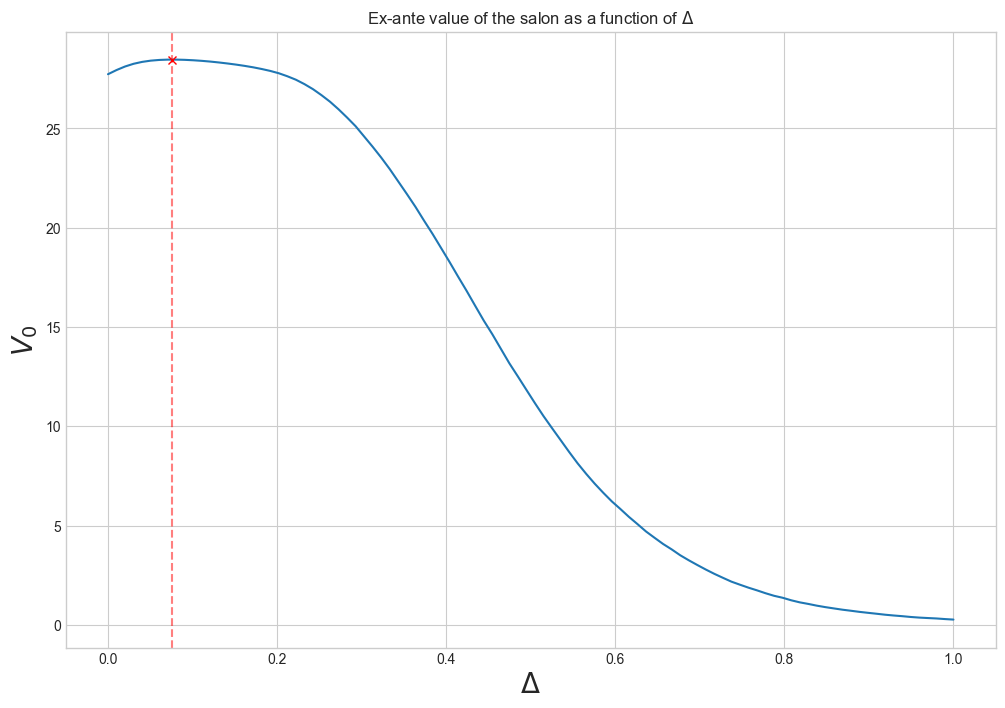

In [24]:
fig = plt.figure()

ax = fig.add_subplot(1,1,1)

## make plot bigger
fig.set_size_inches(12, 8)


ax.plot(delta_vec, val)
ax.set_xlabel(r'$\Delta$', size = 20)
ax.set_ylabel(r'$V_0$', size = 20)
# mark the optimal delta
ax.plot(delt_opt,ex_ante(R=R, kappa=kappa, l=policy2(eta=eta, kappa=kappa, w=w, Delta=delt_opt), w=w, eta=eta, iota=iota, t=1, T=T, K=K), 'rx')

## plot vertical at optimal delta
ax.axvline(x=delt_opt, linestyle='--', color='red', alpha = 0.5)

ax.set_title(r'Ex-ante value of the salon as a function of $\Delta$')
plt.show()


**Question 5:** Suggest an alternative policy you believe might improve profitability. Implement and test your policy.



In [124]:
def policy3(eta, kappa, w, Delta=0, Gamma=0):
    # calculate the optimal labor supply
    l = np.zeros((K,T+1))
    moving_avg = np.zeros((K,T+1))
    for t in range(1, T+1):
        l[:,t] = ((eta*kappa[:,t])/w)**(1/(1-eta))
        moving_avg[:,t] = np.mean(kappa[:,:t], axis=1)  # calculate the moving average of the past demand shocks

    if Delta != 0:
        for t in range(1, T+1):
            for k in range(0,K):
                if np.abs(l[k,t-1] - l[k,t]) <= Delta:
                    l[k,t] = l[k,t-1]

    if Gamma != 0:
        for t in range(1, T+1):
            for k in range(0,K):
                if moving_avg[k,t] > kappa[k,t] + Gamma:
                    l[k,t] += Gamma  # hire more employees if the moving average is significantly larger than the current demand
                elif moving_avg[k,t] < kappa[k,t] - Gamma:
                    l[k,t] -= Gamma  # hire fewer employees if the moving average is significantly smaller than the current demand

    return l

l3 = policy3(eta=0.5, kappa=kappa, w=1.0, Delta=0.05, Gamma=0.05)
ex_ante(R=R, kappa=kappa, l=l3, w=w, eta=eta, iota=iota, t=1, T=T, K=K)


# write optuna script that maximizes the ex-ante value of the salon
import optuna

def objective(trial):
    Delta = trial.suggest_uniform('Delta', 0.05, 0.5)
    Gamma = trial.suggest_uniform('Gamma', 0.05, 0.5)
    l = policy3(eta=eta, kappa=kappa, w=w, Delta=Delta, Gamma=Gamma)
    return - ex_ante(R=R, kappa=kappa, l=l, w=w, eta=eta, iota=iota, t=1, T=T, K=K)

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)


print('Best value: ', study.best_value)

[I 2023-05-26 11:45:13,909] A new study created in memory with name: no-name-a3c77cdb-f24e-40c1-b833-21649b07136d
[W 2023-05-26 11:45:15,295] Trial 0 failed with parameters: {'Delta': 0.23296494569983867, 'Gamma': 0.14653919353788314} because of the following error: The value nan is not acceptable..
[W 2023-05-26 11:45:15,296] Trial 0 failed with value nan.
[W 2023-05-26 11:45:16,711] Trial 1 failed with parameters: {'Delta': 0.3611080346644807, 'Gamma': 0.37009007961155355} because of the following error: The value nan is not acceptable..
[W 2023-05-26 11:45:16,711] Trial 1 failed with value nan.
[W 2023-05-26 11:45:18,098] Trial 2 failed with parameters: {'Delta': 0.1867334681649434, 'Gamma': 0.17716847334975822} because of the following error: The value nan is not acceptable..
[W 2023-05-26 11:45:18,098] Trial 2 failed with value nan.
[W 2023-05-26 11:45:19,498] Trial 3 failed with parameters: {'Delta': 0.3658570851250283, 'Gamma': 0.15204157125870776} because of the following error

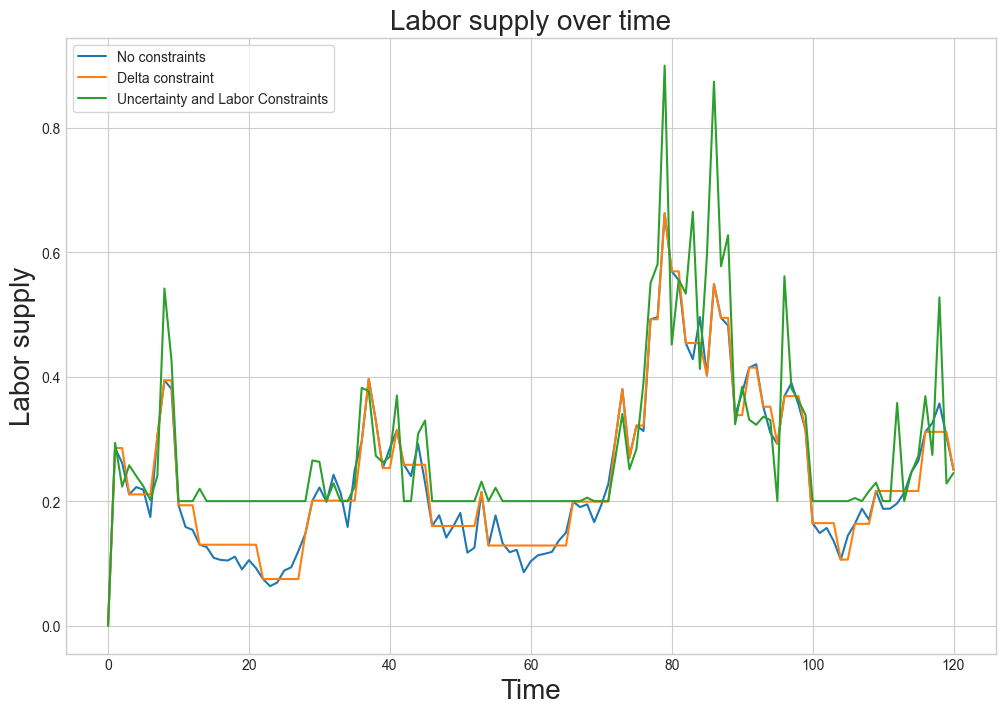

27.532648252160243

In [56]:
def policy3(eta, kappa, w, Delta=0, l_min=0, l_max=1, sigma=0.1):
    # calculate the optimal labor supply
    K, T = kappa.shape
    l = np.zeros((K,T))
    for t in range(1, T):
        # Add stochastic shocks to the wage rate
        w_shock = w * np.random.normal(loc=1, scale=sigma, size=K)
        l[:,t] = ((eta*kappa[:,t])/w_shock)**(1/(1-eta)) 

        # Apply constraints to the labor supply
        l[:,t] = np.clip(l[:,t], l_min, l_max)

    if Delta != 0:
        for t in range(1, T+1):
            for k in range(0,K):
                if np.abs(l[k,t-1] - l[k,t]) <= Delta:
                    l[k,t] = l[k,t-1]                

    return l

l3 = policy3(eta=eta, kappa=kappa, w=w, Delta=0, l_min=0.2, l_max=0.9, sigma=0.1)

# plot policy the different constraints
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

## make plot bigger
fig.set_size_inches(12, 8)
ax.plot(l1[0,:], label='No constraints')
ax.plot(l2[0,:], label='Delta constraint')
ax.plot(l3[0,:], label='Uncertainty and Labor Constraints')
ax.set_xlabel('Time', size = 20)
ax.set_ylabel('Labor supply', size = 20)
ax.set_title('Labor supply over time', size = 20)
ax.legend(loc='upper left', fontsize = 10, frameon = True)
plt.show()



ex_ante(R=R, kappa=kappa, l=l3, w=w, eta=eta, iota=iota, t=1, T=T, K=K)


In [107]:
@njit(fastmath=True)
def policy_kap(eta, kappa, w, Delta=0):
    # calculate the optimal labor supply
    l = np.zeros((K,T+1))
    for t in range(1, T+1):
        l[:,t] = ((1-eta)*kappa[:,t]/w)**(1/eta) 

    if Delta != 0:
        for t in range(2, T+1): # Start from the 3rd period (index 2) as we are looking back 2 periods
            for k in range(0,K):
                # Check if kappa has decreased or increased for two consecutive periods
                if kappa[k, t-1] < kappa[k, t-2] and kappa[k, t] < kappa[k, t-1]: # Decrease in kappa for two periods
                    l[k,t] -= Delta # Decrease labor supply
                elif kappa[k, t-1] > kappa[k, t-2] and kappa[k, t] > kappa[k, t-1]: # Increase in kappa for two periods
                    l[k,t] += Delta # Increase labor supply

    return l


lm = policy_kap(eta=eta, kappa=kappa, w=w, Delta=0.05)
ex_ante(R=R, kappa=kappa, l=lm, w=w, eta=eta, iota=iota, t=1, T=T, K=K)



nan

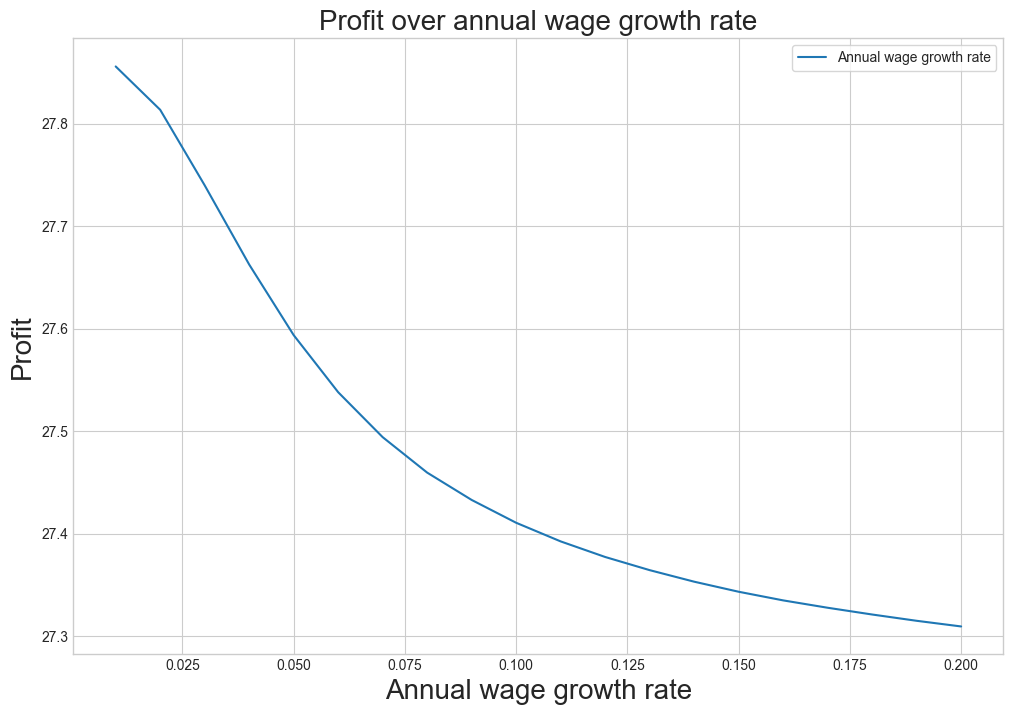

In [76]:
# append profit for each annual growth rate to a list and plot it with the annual growth rate on the x-axis and the profit on the y-axis

profit = []
ang = np.linspace(0.01, 0.20, 20)


for i in range(0,20):
    l3 = policy3(eta=eta, kappa=kappa, w=w, Delta=0, l_min=0.2, l_max=0.9, sigma=0.1, ang = ang[i])
    profit.append(ex_ante(R=R, kappa=kappa, l=l3, w=w, eta=eta, iota=iota, t=1, T=T, K=K))

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

## make plot bigger

fig.set_size_inches(12, 8)

ax.plot(ang, profit, label='Annual wage growth rate')

ax.set_xlabel('Annual wage growth rate', size = 20)

ax.set_ylabel('Profit', size = 20)

ax.set_title('Profit over annual wage growth rate', size = 20)

ax.legend(loc='upper right', fontsize = 10, frameon = True)

plt.show()





## 3. <a id='toc3_'></a>[Problem 3: Global optimizer with refined multi-start](#toc0_)

We consider the Griewank function:

$$ f(\boldsymbol{x}) = \sum^n_{i=1} \frac{x^2_i}{4000}-\prod^n_{i=1}\cos\left(\frac{x_i}{\sqrt{i}}\right)+1$$

The **global minimum** of this function is $f(0,0) = 0$ (remember: $\cos(0)=1$).<br>
But the function also have a lot of **local minima**.

In [26]:
def griewank(x):
    return griewank_(x[0],x[1])
    
def griewank_(x1,x2):
    A = x1**2/4000 + x2**2/4000
    B = np.cos(x1/np.sqrt(1))*np.cos(x2/np.sqrt(2))
    return A-B+1

A **refined global optimizer with multi-start** is:

1. Choose *bounds* for $\mathbf{x}$ and *tolerance* $\tau > 0$.
2. Choose number of *warm-up iterations*, $\underline{K} > 0$ and *maximum number of iterations*, $K > \underline{K}$.
3. In each iteration for $k \in \{0,1,\dots,K-1\}$:

    A. Draw random $\mathbf{x}^k$ uniformly within chosen bounds.

    B. If $k < \underline{K}$ go to step E.

    C. Calculate $\chi^k = 0.50\cdot\frac{2}{1+\exp((k-\underline{K})/100)}$  

    D. Set $\mathbf{x}^{k0} = \chi^k \mathbf{x}^k + (1-\chi^k)\mathbf{x}^{\ast} $

    E. Run optimizer with $\mathbf{x}^{k0}$ as initial guess and $\mathbf{x}^{k\ast}$ as result.

    F. Set $\mathbf{x}^{\ast} = \mathbf{x}^{k\ast}$ if $k = 0$ or $f(\mathbf{x}^{k\ast}) < f(\mathbf{x}^{\ast})$

    G. If $f(\mathbf{x}^{\ast}) < \tau$ go to step 4.

4. Return the result $\mathbf{x}^{\ast}$.

As settings we choose:

* $x_1,x_2 \in  [-600,600]$
* $\tau = 10^{-8}$
* $\underline{K}=10$
* $K=1000$

The optimizer in Step 3.E is `BFGS` with a tolerance of $\tau$.

**Question 1:** Implement the refined global optimizer with multi-start. Illustrate how the effective initial guesses $\mathbf{x}^{k0}$ vary with the iteration counter $k$.

In [27]:
# write your code here

**Question 2:** Is it a better idea to set $\underline{K} = 100$? Is the convergence faster?

In [28]:
# write your code here